In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("simulated_bp_data.csv")


In [2]:
# Function to classify BP
def classify_bp(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return "Normal"
    elif 120 <= systolic <= 129 and diastolic < 80:
        return "Elevated"
    elif 130 <= systolic <= 139 or 80 <= diastolic <= 89:
        return "Hypertension Stage 1"
    else:
        return "Hypertension Stage 2"

In [3]:
# Add a new column for the category
df["Category"] = df.apply(lambda row: classify_bp(row["Systolic BP"], row["Diastolic BP"]), axis=1)


In [4]:
# Save the updated dataset
df.to_csv("labeled_bp_data.csv", index=False)
print("Labeled BP data saved to 'labeled_bp_data.csv'")


Labeled BP data saved to 'labeled_bp_data.csv'


In [5]:
# Display the first 5 rows
print(df.head())

   Patient ID  Systolic BP  Diastolic BP  Heart Rate            Timestamp  \
0           1   111.650664     80.732233   64.729996  2023-10-01 00:00:00   
1           1   115.248587     84.240755   76.165165  2023-10-01 00:15:00   
2           1   120.213294     86.227280   75.470877  2023-10-01 00:30:00   
3           1   108.091682     82.071017   73.290267  2023-10-01 00:45:00   
4           1   122.632652     80.295333   72.990401  2023-10-01 01:00:00   

               Category  
0  Hypertension Stage 1  
1  Hypertension Stage 1  
2  Hypertension Stage 1  
3  Hypertension Stage 1  
4  Hypertension Stage 1  


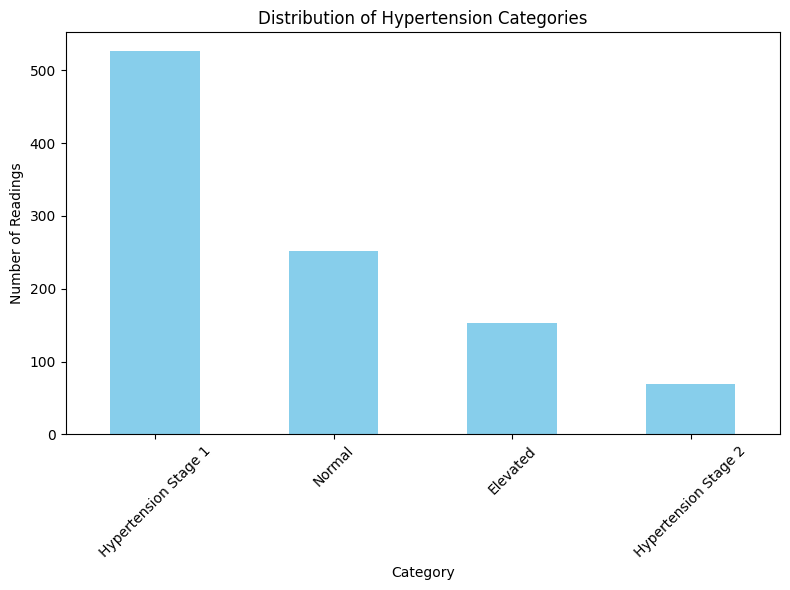

In [6]:
import matplotlib.pyplot as plt

# Count the number of readings in each category
category_counts = df["Category"].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
category_counts.plot(kind="bar", color="skyblue")
plt.title("Distribution of Hypertension Categories")
plt.xlabel("Category")
plt.ylabel("Number of Readings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib
# Features and labels
X = df[["Systolic BP", "Diastolic BP", "Heart Rate"]]
y = df["Category"]

# Encode labels into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Save the label encoder to a file
joblib.dump(label_encoder, "label_encoder.pkl")

Training set size: (800, 3)
Testing set size: (200, 3)


['label_encoder.pkl']

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.97

Classification Report:
                       precision    recall  f1-score   support

            Elevated       0.95      1.00      0.97        36
Hypertension Stage 1       0.96      1.00      0.98        95
Hypertension Stage 2       1.00      0.67      0.80        15
              Normal       1.00      0.98      0.99        54

            accuracy                           0.97       200
           macro avg       0.98      0.91      0.94       200
        weighted avg       0.97      0.97      0.97       200



In [9]:
import joblib

# Save the model
joblib.dump(model, "hypertension_classifier.pkl")
print("Model saved as 'hypertension_classifier.pkl'")

Model saved as 'hypertension_classifier.pkl'


In [10]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new distribution of classes
print("Balanced class distribution:", pd.Series(y_train_balanced).value_counts())

Balanced class distribution: 1    431
0    431
3    431
2    431
Name: count, dtype: int64


In [11]:
# Retrain the model on balanced data
model_balanced = RandomForestClassifier(random_state=42)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_balanced = model_balanced.predict(X_test)

# Evaluate the model
print("Accuracy (Balanced Model):", accuracy_score(y_test, y_pred_balanced))
print("\nClassification Report (Balanced Model):\n", classification_report(y_test, y_pred_balanced, target_names=label_encoder.classes_))

Accuracy (Balanced Model): 0.97

Classification Report (Balanced Model):
                       precision    recall  f1-score   support

            Elevated       1.00      1.00      1.00        36
Hypertension Stage 1       0.97      0.97      0.97        95
Hypertension Stage 2       0.80      0.80      0.80        15
              Normal       1.00      1.00      1.00        54

            accuracy                           0.97       200
           macro avg       0.94      0.94      0.94       200
        weighted avg       0.97      0.97      0.97       200



In [12]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


Accuracy (XGBoost): 0.99

Classification Report (XGBoost):
                       precision    recall  f1-score   support

            Elevated       1.00      1.00      1.00        36
Hypertension Stage 1       0.99      0.99      0.99        95
Hypertension Stage 2       1.00      0.93      0.97        15
              Normal       0.98      1.00      0.99        54

            accuracy                           0.99       200
           macro avg       0.99      0.98      0.99       200
        weighted avg       0.99      0.99      0.99       200



In [13]:
import joblib

# Save the best model (e.g., XGBoost)
joblib.dump(xgb_model, "hypertension_classifier_xgb.pkl")
print("XGBoost model saved as 'hypertension_classifier_xgb.pkl'")

XGBoost model saved as 'hypertension_classifier_xgb.pkl'


In [14]:
model = joblib.load("hypertension_classifier_xgb.pkl")

In [15]:
def predict_hypertension(systolic, diastolic, heart_rate):
    input_data = [[systolic, diastolic, heart_rate]]
    prediction = model.predict(input_data)
    return label_encoder.inverse_transform(prediction)[0]

In [16]:
result = predict_hypertension(140, 90, 80)
print("Predicted Category:", result)  # Output: "Hypertension Stage 2"

Predicted Category: Hypertension Stage 1
